<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0621_%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%82%AC%EA%B8%B0_%EA%B2%80%EC%B6%9C%2C_%EC%8A%A4%ED%83%9C%ED%82%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

knn은 fitting은 얼마 걸리지 않지만 predict에 시간이 오래 걸림

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
path='/content/drive/MyDrive/python_basic/data/creditcard.csv'

In [5]:
df=pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df=df.drop('Time',axis=1)

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
data=df.drop('Class',axis=1)
label=df['Class']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,label)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [14]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
models=[lr,knn]

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    pred_proba=model.predict_proba(x_test)[:,1]
    get_clf_eval(y_test,pred,pred_proba)

In [22]:
def get_model_train_eval(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  get_clf_eval(y_test,pred,pred_proba)

In [21]:
from lightgbm import LGBMClassifier

In [23]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
lgbm=LGBMClassifier()
models=[lr,knn,lgbm]
for model in models:
    get_model_train_eval(model,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
오차 행렬
[[71056    17]
 [   42    87]]
정확도: 0.9992, 정밀도: 0.8365, 재현율: 0.6744,    F1: 0.7468, AUC:0.9709
KNeighborsClassifier
오차 행렬
[[71065     8]
 [   47    82]]
정확도: 0.9992, 정밀도: 0.9111, 재현율: 0.6357,    F1: 0.7489, AUC:0.8990
LGBMClassifier
오차 행렬
[[70898   175]
 [   99    30]]
정확도: 0.9962, 정밀도: 0.1463, 재현율: 0.2326,    F1: 0.1796, AUC:0.4591


In [24]:
lgbm=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm,x_train,x_test,y_train,y_test)

LGBMClassifier
오차 행렬
[[71070     3]
 [   26   103]]
정확도: 0.9996, 정밀도: 0.9717, 재현율: 0.7984,    F1: 0.8766, AUC:0.9837


In [25]:
import seaborn as sns

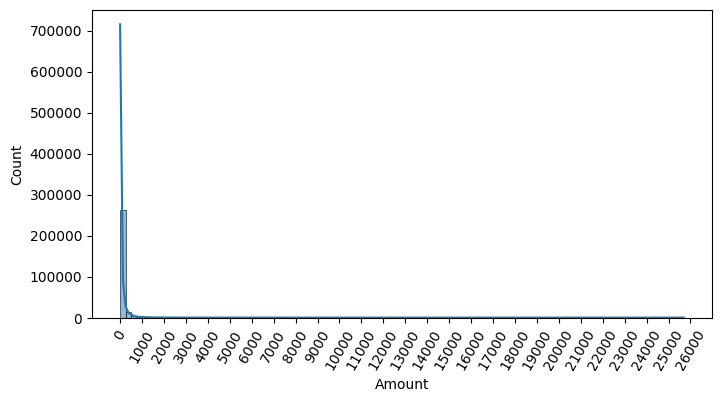

In [26]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.histplot(df['Amount'],bins=100,kde=True)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()
ss.fit(data)
scaled_data=ss.transform(data)
x_train,x_test,y_train,y_test=train_test_split(scaled_data,label)

In [29]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71068     7]
 [   56    71]]
정확도: 0.9991, 정밀도: 0.9103, 재현율: 0.5591,    F1: 0.6927, AUC:0.9706
KNeighborsClassifier
오차 행렬
[[71070     5]
 [   39    88]]
정확도: 0.9994, 정밀도: 0.9462, 재현율: 0.6929,    F1: 0.8000, AUC:0.9054
LGBMClassifier
오차 행렬
[[71073     2]
 [   37    90]]
정확도: 0.9995, 정밀도: 0.9783, 재현율: 0.7087,    F1: 0.8219, AUC:0.9769


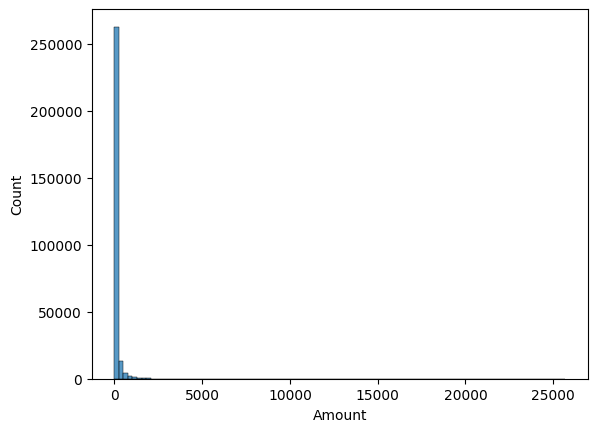

In [30]:
sns.histplot(df['Amount'],bins=100)
plt.show()

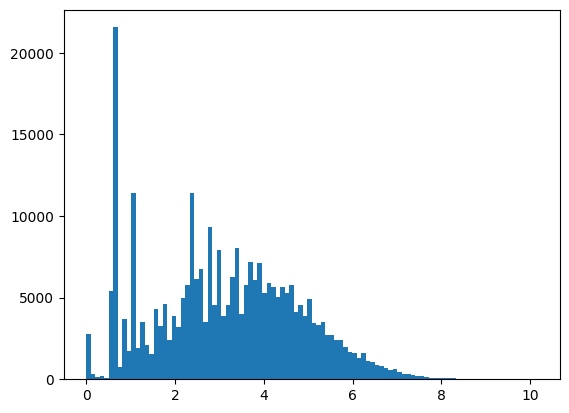

In [31]:
la=np.log1p(df['Amount'])
plt.hist(la,bins=100)
plt.show()

In [32]:
df['Amount'] = np.log1p(df['Amount'])
data=df.drop('Class',axis=1)
label=df['Class']

ss=StandardScaler()
ss.fit(data)
scaled_data=ss.transform(data)
x_train,x_test,y_train,y_test=train_test_split(scaled_data,label)

In [33]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71061    12]
 [   38    91]]
정확도: 0.9993, 정밀도: 0.8835, 재현율: 0.7054,    F1: 0.7845, AUC:0.9679
KNeighborsClassifier
오차 행렬
[[71060    13]
 [   29   100]]
정확도: 0.9994, 정밀도: 0.8850, 재현율: 0.7752,    F1: 0.8264, AUC:0.9223
LGBMClassifier
오차 행렬
[[71068     5]
 [   24   105]]
정확도: 0.9996, 정밀도: 0.9545, 재현율: 0.8140,    F1: 0.8787, AUC:0.9821


In [ ]:
df.corr()

In [35]:
def get_outlier(df,column,weight=1.5):
    return get_outlier2(df,column,df['Class']==1,weight)

In [36]:
def get_outlier2(df,column,filter,weight=1.5):
    sdf=df[filter][column]
    q1=np.percentile(sdf.values,25)
    q3=np.percentile(sdf.values,75)
    iqr=q3-q1
    iqr_weight=iqr*weight
    lowest=q1-iqr_weight
    highest=q3+iqr_weight
    outlier_index=sdf[(sdf<lowest)|(sdf>highest)].index
    return outlier_index

In [37]:
get_outlier(df,'V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [38]:
df['V14'].describe()

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

In [43]:
oi=get_outlier(df,'V14')
df=df.drop(oi,axis=0)

In [44]:
data = df.drop('Class',axis=1)
label = df['Class']
ss =StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 label)

In [45]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71080     8]
 [   39    74]]
정확도: 0.9993, 정밀도: 0.9024, 재현율: 0.6549,    F1: 0.7590, AUC:0.9907
KNeighborsClassifier
오차 행렬
[[71082     6]
 [   21    92]]
정확도: 0.9996, 정밀도: 0.9388, 재현율: 0.8142,    F1: 0.8720, AUC:0.9512
LGBMClassifier
오차 행렬
[[71084     4]
 [   17    96]]
정확도: 0.9997, 정밀도: 0.9600, 재현율: 0.8496,    F1: 0.9014, AUC:0.9926


In [46]:
from imblearn.over_sampling import SMOTE

In [49]:
smote=SMOTE()
x_train_o,y_train_o=smote.fit_resample(x_train,y_train)
pd.Series(y_train_o).value_counts()

0    213227
1    213227
Name: Class, dtype: int64

In [50]:
y_train.value_counts()

0    213227
1       375
Name: Class, dtype: int64

In [51]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train_o,x_test,y_train_o,y_test)

LogisticRegression
오차 행렬
[[68899  2189]
 [    4   109]]
정확도: 0.9692, 정밀도: 0.0474, 재현율: 0.9646,    F1: 0.0904, AUC:0.9924
KNeighborsClassifier
오차 행렬
[[70955   133]
 [   10   103]]
정확도: 0.9980, 정밀도: 0.4364, 재현율: 0.9115,    F1: 0.5903, AUC:0.9598
LGBMClassifier
오차 행렬
[[71071    17]
 [   15    98]]
정확도: 0.9996, 정밀도: 0.8522, 재현율: 0.8673,    F1: 0.8596, AUC:0.9765


# 스태킹
- x,y train데이터를 fitting 후 xtrain데이터로 predict-> ypredict를 xtrain으로 변환후 다시 fitting

In [53]:
from sklearn.datasets import load_breast_cancer

In [54]:
cancer=load_breast_cancer()

In [55]:
data=cancer.data
label=cancer.target

In [57]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
ss=StandardScaler()
ss.fit(data)
scaled_data=ss.transform(data)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,label)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [63]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression()

In [65]:
models=[knn,rf,dt,ada,lr]
meta_train=[]
meta_test=[]
df_train=pd.DataFrame()
df_test=pd.DataFrame()
for i,model in enumerate(models):
    model.fit(x_train,y_train)
    df_train[str(i)]=model.predict(x_train)
    df_test[str(i)]=model.predict(x_test)


In [68]:
df_train

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
421,1,1,1,1,1
422,0,0,0,0,0
423,0,0,0,0,0
424,0,0,0,0,0


In [69]:
lr=LogisticRegression()
lr.fit(df_train,y_train)
pred=lr.predict(df_test)
pp=lr.predict(df_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [73]:
lr = LogisticRegression()
lr.fit(df_train,y_train)
pred = lr.predict(df_test)
pp = lr.predict_proba(df_test)[:,1]

In [76]:
get_clf_eval(y_test,pred,pp)

오차 행렬
[[45  1]
 [ 1 96]]
정확도: 0.9860, 정밀도: 0.9897, 재현율: 0.9897,    F1: 0.9897, AUC:0.9879
